#Informatyczne Platformy Analizy Danych - Filip Koźlik 
**Zadanie 1** \
Dane do realizacji zadania zostały pobrane z użyciem api udostępnionego przez stronę: https://www.themoviedb.org/documentation/api.

**Opis użytych importów:**
1. import requests - obsługa api,
2. import numpy - działania matematyczne na zbiorze danych,
3. import seaborn - wizualizacja danych,
4. import pandas - obsługa ramki danych,
5. import plotly.express - wizualizacja danych,
6. import matplotlib.pyplo - wizualizacja danych.





In [46]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Formatowanie wyświetlania float'ów

In [45]:
pd.options.display.float_format = '{:.2f}'.format

**Obsługa API**

In [47]:
API_key = 'api_key=3f266b462e3069f14c3b2f9fce311475'
basic_url = "https://api.themoviedb.org/3/discover/movie?" 
condition = '&primary_release_year=2022'

In [ ]:
url = basic_url + API_key + condition
data = requests.get(url).json()

In [ ]:
import pandas as pd
df = pd.DataFrame(data['results'])
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/5P8SmMzSNYikXpxil6BYzJ16611.jpg,"[80, 9648, 53]",414906,en,The Batman,"In his second year of fighting crime, Batman u...",3232.551,/74xTEgt7R36Fpooo50r9T25onhq.jpg,2022-03-01,The Batman,False,8.0,1482
1,False,/tAztR7AXEesMQAAi5ncFPSZtYlI.jpg,"[27, 53]",833425,en,No Exit,Stranded at a rest stop in the mountains durin...,3008.631,/5cnLoWq9o5tuLe1Zq4BTX4LwZ2B.jpg,2022-02-25,No Exit,False,6.4,191
2,False,/7CamWBejQ9JQOO5vAghZfrFpMXY.jpg,"[28, 53, 80]",928381,fr,Sans répit,After going to extremes to cover up an acciden...,2168.240,/aw4GGsRwhQtyLsjzC7dsAahfCDY.jpg,2022-02-25,Restless,False,5.9,139
3,False,/pnZ9NMxRqbcJ2dPNROIoregruv5.jpg,"[28, 80, 53]",753232,en,The Commando,An elite DEA agent returns home after a failed...,2022.086,/pSh8MyYu5CmfyWEHzv8FEARH2zq.jpg,2022-01-07,The Commando,False,6.6,51
4,False,/mruT954ve6P1zquaRs6XG0hA5k9.jpg,[53],800510,en,Kimi,A tech worker with agoraphobia discovers recor...,1616.429,/okNgwtxIWzGsNlR3GsOS0i0Qgbn.jpg,2022-02-10,Kimi,False,6.3,235


**Oczyszczanie danych**

In [ ]:
df.drop(['genre_ids', 'backdrop_path', 'poster_path'], axis=1, inplace=True)
df.head()

,adult,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,414906,en,The Batman,"In his second year of fighting crime, Batman u...",3232.551,2022-03-01,The Batman,False,8.0,1482
1,False,833425,en,No Exit,Stranded at a rest stop in the mountains durin...,3008.631,2022-02-25,No Exit,False,6.4,191
2,False,928381,fr,Sans répit,After going to extremes to cover up an acciden...,2168.240,2022-02-25,Restless,False,5.9,139
3,False,753232,en,The Commando,An elite DEA agent returns home after a failed...,2022.086,2022-01-07,The Commando,False,6.6,51
4,False,800510,en,Kimi,A tech worker with agoraphobia discovers recor...,1616.429,2022-02-10,Kimi,False,6.3,235


In [ ]:
df.isna().sum()

adult                0
id                   0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
dtype: int64

Sprawdzenie średniej oceny filmów oraz znalezienie listy o ocenie powyżej średniej.

In [ ]:
df.vote_average.mean()

6.264999999999999

In [ ]:
df[df.vote_average > df.vote_average.mean()]

,adult,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,414906,en,The Batman,"In his second year of fighting crime, Batman u...",3232.551,2022-03-01,The Batman,False,8.0,1482
1,False,833425,en,No Exit,Stranded at a rest stop in the mountains durin...,3008.631,2022-02-25,No Exit,False,6.4,191
3,False,753232,en,The Commando,An elite DEA agent returns home after a failed...,2022.086,2022-01-07,The Commando,False,6.6,51
4,False,800510,en,Kimi,A tech worker with agoraphobia discovers recor...,1616.429,2022-02-10,Kimi,False,6.3,235
7,False,646385,en,Scream,Twenty-five years after a streak of brutal mur...,1441.815,2022-01-12,Scream,False,6.8,874
8,False,774825,en,The Ice Age Adventures of Buck Wild,The fearless one-eyed weasel Buck teams up wit...,1423.270,2022-01-28,The Ice Age Adventures of Buck Wild,False,7.1,762
9,False,585083,en,Hotel Transylvania: Transformania,"When Van Helsing's mysterious invention, the ""...",1358.455,2022-02-25,Hotel Transylvania: Transformania,False,7.0,331
14,False,508947,en,Turning Red,Thirteen-year-old Mei is experiencing the awkw...,1017.773,2022-03-10,Turning Red,False,7.4,78
16,False,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",934.421,2022-02-04,Looop Lapeta,False,6.3,36
17,False,335787,en,Uncharted,"A young street-smart, Nathan Drake and his wis...",874.052,2022-02-10,Uncharted,False,7.1,723


Sprawdzenie ile filmów jest dostępnych dla dorosłych widzów oraz ile filmów posiada taki sam tytuł oryginalny jak i w ang. wersji.

In [ ]:
df[df.adult == 'True'].count().sum()

0

In [ ]:
df[df.original_title == df.title].count()

adult                17
id                   17
original_language    17
original_title       17
overview             17
popularity           17
release_date         17
title                17
video                17
vote_average         17
vote_count           17
dtype: int64

Lista filmów o popularności powyżej średniej.

In [ ]:
df[df.popularity > df.popularity.mean()]

,adult,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,414906,en,The Batman,"In his second year of fighting crime, Batman u...",3232.551,2022-03-01,The Batman,False,8.0,1482
1,False,833425,en,No Exit,Stranded at a rest stop in the mountains durin...,3008.631,2022-02-25,No Exit,False,6.4,191
2,False,928381,fr,Sans répit,After going to extremes to cover up an acciden...,2168.240,2022-02-25,Restless,False,5.9,139
3,False,753232,en,The Commando,An elite DEA agent returns home after a failed...,2022.086,2022-01-07,The Commando,False,6.6,51
4,False,800510,en,Kimi,A tech worker with agoraphobia discovers recor...,1616.429,2022-02-10,Kimi,False,6.3,235
6,False,890656,en,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1492.655,2022-02-17,Fistful of Vengeance,False,5.4,126


In [ ]:
df_val = df.drop([
                  'adult',
                  'id',
                  'original_title',
                  'overview',
                  'release_date',
                  'title',
                  'video'
], axis=1)

Macierz korelacji

In [ ]:
df_val.corr().style.background_gradient()

,popularity,vote_average,vote_count
popularity,1.000000,0.283989,0.414478
vote_average,0.283989,1.000000,0.562978
vote_count,0.414478,0.562978,1.000000


**Analiza i wizualizacja**

5 najlepiej ocenianych filmów

In [ ]:
largest_score = df.nlargest(5, 'vote_average')
largest_score

,adult,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,414906,en,The Batman,"In his second year of fighting crime, Batman u...",3232.551,2022-03-01,The Batman,False,8.0,1482
14,False,508947,en,Turning Red,Thirteen-year-old Mei is experiencing the awkw...,1017.773,2022-03-10,Turning Red,False,7.4,78
8,False,774825,en,The Ice Age Adventures of Buck Wild,The fearless one-eyed weasel Buck teams up wit...,1423.270,2022-01-28,The Ice Age Adventures of Buck Wild,False,7.1,762
17,False,335787,en,Uncharted,"A young street-smart, Nathan Drake and his wis...",874.052,2022-02-10,Uncharted,False,7.1,723
9,False,585083,en,Hotel Transylvania: Transformania,"When Van Helsing's mysterious invention, the ""...",1358.455,2022-02-25,Hotel Transylvania: Transformania,False,7.0,331


In [48]:
fig = px.bar(largest_score, x="title", y="vote_average", 
             color="vote_average", title=r'Najlepiej oceniane filmy')
fig.show()

Utworzenie kolumny, odzwierciedlającej popularność filmu.

In [49]:
df['is_popular'] = np.where(df.popularity > df.popularity.mean(), 'Yes', 'No')

Utworzeni backetów odzwierciedlających średnią ocenę: \
Skala od Bronze (najniższe oceny) -> Diamond (najwyższe oceny)

In [40]:
bin_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['vote_bucket'] = pd.qcut(df['vote_average'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels)
df.head()

,adult,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,is_popular,vote_bucket
0,False,414906,en,The Batman,"In his second year of fighting crime, Batman u...",3232.551,2022-03-01,The Batman,False,8.0,1482,Yes,Diamond
1,False,833425,en,No Exit,Stranded at a rest stop in the mountains durin...,3008.631,2022-02-25,No Exit,False,6.4,191,Yes,Gold
2,False,928381,fr,Sans répit,After going to extremes to cover up an acciden...,2168.240,2022-02-25,Restless,False,5.9,139,Yes,Silver
3,False,753232,en,The Commando,An elite DEA agent returns home after a failed...,2022.086,2022-01-07,The Commando,False,6.6,51,Yes,Platinum
4,False,800510,en,Kimi,A tech worker with agoraphobia discovers recor...,1616.429,2022-02-10,Kimi,False,6.3,235,Yes,Gold


Stworzenie crosstab'a oraz heatmapy

In [41]:
popular_agg = pd.crosstab(index = df.vote_bucket, columns = df.is_popular)
popular_agg.head()

is_popular,No,Yes
vote_bucket,,
Bronze,3,1
Silver,3,1
Gold,2,2
Platinum,3,1
Diamond,3,1


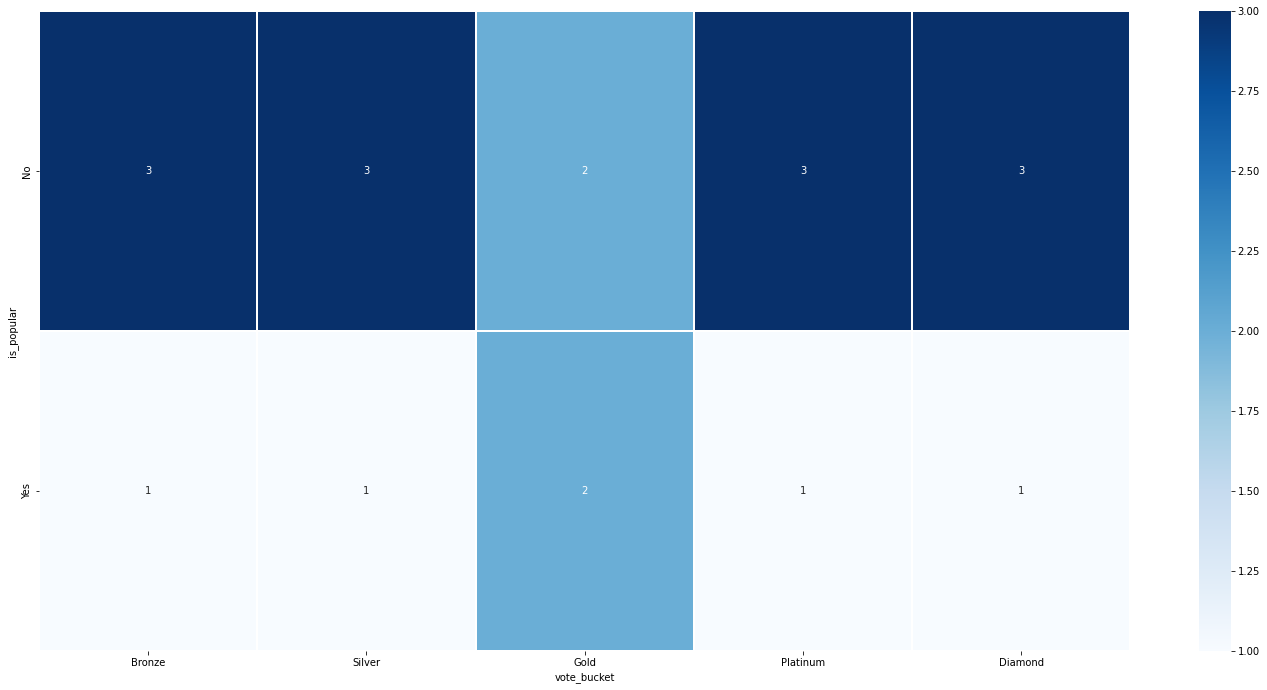

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(popular_agg.T, annot=True, cmap='Blues', linewidths=1)
sns.set(font_scale= 1.7)
plt.tight_layout()
plt.show()

Wykres rozproszenia średniej oceny głosów od popularności filmu.

In [44]:
import plotly.express as px
px.scatter(df, x='vote_average', y='popularity', color='vote_average', width=800, height=500, 
           title= 'Wykres rozproszenia średniej oceny głosów od popularności filmu.')